# Handling class imbalances

Because of class imabalance in our dataset (specifically, our in target varaible "Loan status", where 74% of the loan status is fully paid and 26% are charged off), we need to handle this class imbalance issue before modeling.

Some ways to handle class imabalnce :
1. SMOTE : Synthetic Minority Over-sampling Technique. 
2. EditedNearestNeighbours : removing samples close to the decision boundary.
3. SMOTEENN : Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

We will first plot the base model of each of the four classifiers ( Decision Tree, Logistic Regression, Naive Bayes, Support Vector Machine) , and then apply the 3 class imabalnce methods to these classifiers.

After that we will check the metrics of each model and decide on the best class imabalance method to use.

In [1]:
#load all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from six import StringIO

from sklearn.naive_bayes import GaussianNB 



from sklearn.metrics import confusion_matrix
from sklearn import metrics

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

## Classifier 2: Naive Bayes


0. Base model

In [2]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

FileNotFoundError: ignored

In [ ]:
#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

#scaled_df.head(5)

y.unique() #array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

In [ ]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)


Accuracy: 0.6425175458455965
Precision: 0.740261566586978
Recall: 0.8006083650190114
F1: 0.769253251497881


In [ ]:
#Print out confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cnf_matrix)

[[  824  3694]
 [ 2622 10528]]


In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)
# model will classify a random positive example higher than a random negative example 49.15% of the time. 
# Poor model

0.4914949748955173

1. SMOTE

In [ ]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
#SMOTE oversampling on DT classifier
print(Counter(y_train))

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_resampled)) 
#Counter of classes after oversampling is now more balanced than before

Counter({1: 52600, 0: 18069})
Counter({1: 52600, 0: 52600})


In [ ]:
#Initialise base DT classifier
gnb_1 = GaussianNB()

#Train model with resampled data
gnb_1.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_1 = gnb_1.predict(X_test)

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_1)
precision = metrics.precision_score(y_test, y_pred_1)
recall = metrics.recall_score(y_test, y_pred_1)
f_measure = metrics.f1_score(y_test, y_pred_1)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.2648290695041884
Precision: 0.784452296819788
Recall: 0.01688212927756654
F1: 0.03305292935308569


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_1, labels = [0,1])
print(cnf_matrix)

[[ 4457    61]
 [12928   222]]


In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_1, pos_label=1)
metrics.auc(fpr, tpr)
#Slight improvement from before

0.5016902899597218

2. ENN

In [ ]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
#ENN undersampling on DT classifier
print(Counter(y_train))

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

print(Counter(y_resampled))
#Counter of classes after oversampling is now more balanced than before

Counter({1: 52600, 0: 18069})
Counter({1: 24394, 0: 18069})


In [ ]:
#Initialise base DT classifier
gnb_2 = GaussianNB()

#Train model with resampled data
gnb_2.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_2 = gnb_2.predict(X_test)

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_2)
precision = metrics.precision_score(y_test, y_pred_2)
recall = metrics.recall_score(y_test, y_pred_2)
f_measure = metrics.f1_score(y_test, y_pred_2)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.2619424949060448
Precision: 0.7956989247311828
Recall: 0.011254752851711026
F1: 0.022195560887822433


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_2, labels = [0,1])
print(cnf_matrix)

[[ 4480    38]
 [13002   148]]


In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_2, pos_label=1)
metrics.auc(fpr, tpr)
#This ENN undersampling is slightly worse than SMOTE oversampling

0.5014219758061123

3. SMOTEENN

In [ ]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
#SMOTE-EEN resampling
print(Counter(y_train))
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({1: 52600, 0: 18069})


Counter({0: 33178, 1: 21069})

In [ ]:
#Initialise base DT classifier
gnb_3 = GaussianNB()
#Train model with resampled data
gnb_3.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_3 = gnb_3.predict(X_test)

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_3)
precision = metrics.precision_score(y_test, y_pred_3)
recall = metrics.recall_score(y_test, y_pred_3)
f_measure = metrics.f1_score(y_test, y_pred_3)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.2844690966719493
Precision: 0.8105134474327629
Recall: 0.05041825095057034
F1: 0.09493127147766323


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_3, labels = [0,1])
print(cnf_matrix)

[[ 4363   155]
 [12487   663]]


In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_3, pos_label=1)
metrics.auc(fpr, tpr)
# worse off 

0.5080555176842272

### SMOTE + PCA 
SMOTE seems to be the best method to handle class imbalance


In [ ]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
#SMOTE oversampling on DT classifier
print(Counter(y_train))

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_resampled)) 
#Counter of classes after oversampling is now more balanced than before

Counter({1: 52600, 0: 18069})
Counter({1: 52600, 0: 52600})


In [ ]:
temp_df=pd.concat([X_resampled,X_test],axis=0)
pca=PCA(n_components=15) #PCA on all the columns (15 of them)
pca_components=pca.fit_transform(temp_df)
pca_df = pd.DataFrame(pca_components,columns=['PC' + str(x) for x in range(1, 16)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-4.128944e+04,4.750658e+05,186044.068091,167076.279695,-3669.992661,4.757943,-0.530271,8.705281,4.264080,0.487130,-0.579481,-0.234966,-0.299174,0.028248,-0.007296
1,2.428758e+05,-5.251476e+04,98260.947288,-111907.175834,-6361.270870,-13.702011,7.569955,2.521469,2.969865,0.159082,-0.709639,1.212198,-0.431143,-0.487398,-0.043062
2,-4.523278e+05,-5.333260e+05,-146619.910027,-107747.708186,5027.212854,11.158489,3.582362,0.540786,-2.338307,0.464100,0.828729,1.158082,-0.418975,-0.462533,-0.044854
3,1.509907e+06,3.037879e+06,5170.242163,-258090.505478,-31584.956094,23.596174,-7.727658,3.329842,-3.528276,-1.801431,1.008334,-0.208401,0.097359,-0.056587,0.001962
4,4.212207e+05,4.753280e+05,541795.686895,-232664.925799,18116.866527,120.504450,0.132593,-5.380981,-1.603489,2.678454,-0.994953,-0.188996,-0.551624,0.002702,-0.007817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122863,-3.297434e+05,-5.286332e+05,52404.857187,171752.887502,-3975.607158,8.265430,5.177913,-2.570910,-3.181677,0.786768,-1.299745,-0.184811,-0.263514,0.032635,-0.007324
122864,-4.540135e+05,-4.671448e+05,-217004.081633,162123.242312,2238.360373,-26.048115,4.833883,-2.895211,-4.068912,0.731623,0.596517,-0.176675,0.086970,0.038286,-0.003053
122865,-4.347641e+04,-4.420812e+05,43877.885338,25998.913928,9707.753579,-22.636324,2.553572,-1.063371,-3.488075,0.427326,-1.171023,-0.143833,-0.256415,0.027661,-0.004154
122866,-5.715923e+05,4.934132e+05,-318092.173663,-142745.377606,4990.529573,-13.604630,2.114099,-3.878699,-3.917690,0.426266,0.938804,-0.166866,-0.364301,0.001973,0.000046


In [ ]:
pca.explained_variance_ratio_

array([9.81215910e-01, 1.62937579e-02, 2.01524350e-03, 4.73653470e-04,
       1.43512487e-06, 9.95636588e-12, 7.23647799e-13, 3.23956348e-13,
       1.78552448e-13, 3.49991224e-14, 1.26976496e-14, 5.05503437e-15,
       2.71997109e-15, 1.28110857e-15, 1.48371903e-16])

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]


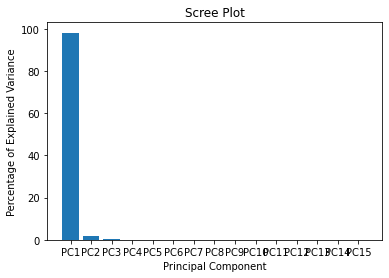

In [ ]:
#Plotting
plt.bar(x=range(1,16), height= per_var , tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
#Initialise base DT classifier
lr_4 = LogisticRegression(random_state= 1)

#Train model with resampled data
lr_4.fit(pca_df.iloc[:len(X_resampled),:], y_resampled)

#get predictions and compare results
y_pred_4 = lr_4.predict(pca_df.iloc[len(X_resampled):,:])

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_4)
precision = metrics.precision_score(y_test, y_pred_4)
recall = metrics.recall_score(y_test, y_pred_4)
f_measure = metrics.f1_score(y_test, y_pred_4)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.5271677609237039
Precision: 0.7918695228821812
Recall: 0.4947528517110266
F1: 0.6090049611532342


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_4, labels = [0,1])
print(cnf_matrix)

[[2808 1710]
 [6644 6506]]


In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_4, pos_label=1)
metrics.auc(fpr, tpr)

#Slightly better than SMOTE

0.5581333979670671